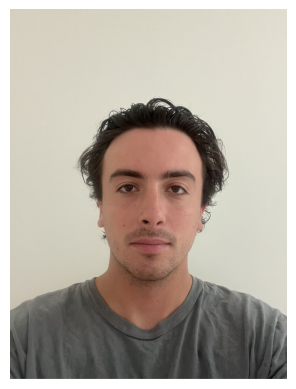

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Path to your image
img_path = "Screenshot.jpg"

# Read and display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Optional: hides the axes
plt.savefig('image_orig')
plt.show()


In [3]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load an image as RGB (PIL Image)."""
    return Image.open(image_path).convert("RGB")

def crop_to_box_face(img):
    """Detect and crop the face automatically."""
    cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    faces = face_cascade.detectMultiScale(cv_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        raise ValueError("No face detected in the image.")
    
    x, y, w, h = faces[0]
    return img.crop((x, y, x + w, y + h))

def crop_to_box_left_eye(img):
    """Detect and crop the left eye automatically."""
    cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

    eyes = eye_cascade.detectMultiScale(cv_img, scaleFactor=1.1, minNeighbors=5)

    if len(eyes) < 2:
        raise ValueError("Less than two eyes detected in the image.")

    eyes = sorted(eyes, key=lambda e: e[0])  # sort by x position
    ex, ey, ew, eh = eyes[0]
    return img.crop((ex, ey, ex + ew, ey + eh))

def crop_to_box_right_eye(img):
    """Detect and crop the right eye automatically."""
    cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

    eyes = eye_cascade.detectMultiScale(cv_img, scaleFactor=1.1, minNeighbors=5)

    if len(eyes) < 2:
        raise ValueError("Less than two eyes detected in the image.")

    eyes = sorted(eyes, key=lambda e: e[0])  # sort by x position
    ex, ey, ew, eh = eyes[-1]
    return img.crop((ex, ey, ex + ew, ey + eh))

def resize_image(img, size=(64, 64)):
    return img.resize(size)

def color_jitter(img, brightness=0.2, contrast=0.2, saturation=0.0, hue=0.0):
    img = TF.adjust_brightness(img, random.uniform(1 - brightness, 1 + brightness))
    img = TF.adjust_contrast(img, random.uniform(1 - contrast, 1 + contrast))
    img = TF.adjust_saturation(img, random.uniform(1 - saturation, 1 + saturation))
    img = TF.adjust_hue(img, random.uniform(-hue, hue))
    return img

def convert_to_grayscale(img):
    return img.convert("L").convert("RGB")

def add_gaussian_noise(img, mean=0, std=0.01):
    np_img = np.array(img).astype(np.float32)
    noise = np.random.normal(mean, std * 255, np_img.shape[:2])
    if np_img.ndim == 3:
        noise = np.stack([noise] * 3, axis=-1)
    noisy = np.clip(np_img + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy)







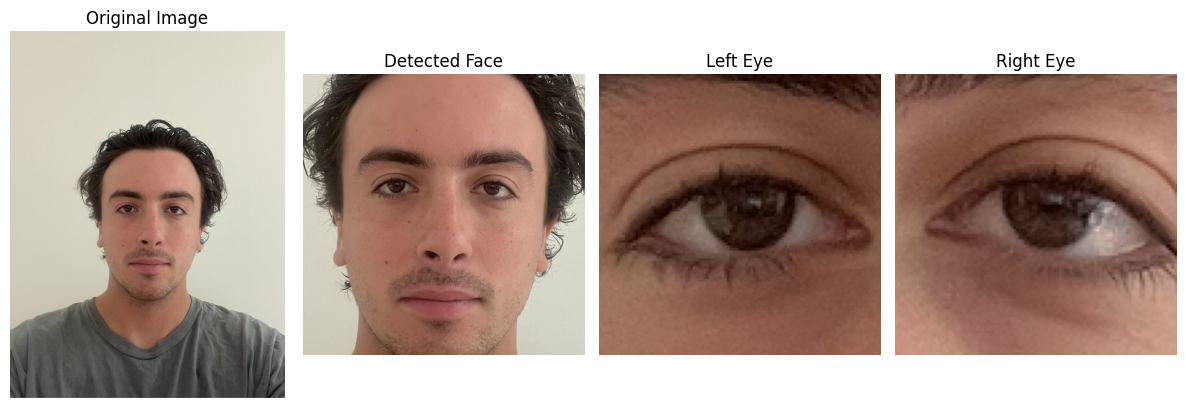

In [4]:

# Example usage (for Jupyter, Colab, or IPython cell)
if __name__ == "__main__":
    image_path = "Screenshot.jpg"
    img = load_image(image_path)
    
    face = crop_to_box_face(img)
    left_eye = crop_to_box_left_eye(face)
    right_eye = crop_to_box_right_eye(face)

    # Show results inline
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    # Face crop
    plt.subplot(1, 4, 2)
    plt.imshow(face)
    plt.title("Detected Face")
    plt.axis("off")

    # Left eye
    plt.subplot(1, 4, 3)
    plt.imshow(left_eye)
    plt.title("Left Eye")
    plt.axis("off")

    # Right eye
    plt.subplot(1, 4, 4)
    plt.imshow(right_eye)
    plt.title("Right Eye")
    plt.axis("off")

    plt.tight_layout()
    plt.show()



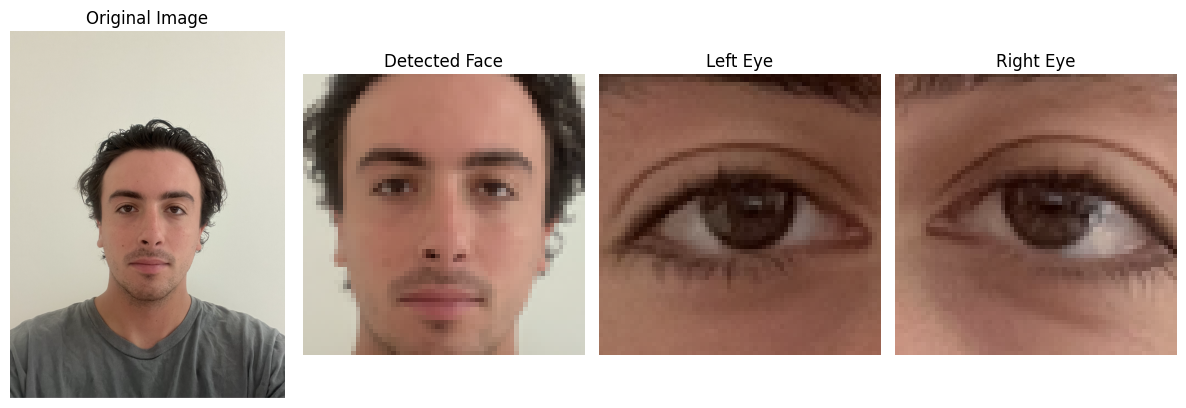

In [5]:

# Example usage (for Jupyter, Colab, or IPython cell)
if __name__ == "__main__":
    image_path = "Screenshot.jpg"
    img = load_image(image_path)
    
    face = crop_to_box_face(img)

    
    left_eye = crop_to_box_left_eye(face)

    
    right_eye = crop_to_box_right_eye(face)


    # Show results inline
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    # Face crop
    plt.subplot(1, 4, 2)
    plt.imshow(resize_image(face))
    plt.title("Detected Face")
    plt.axis("off")

    # Left eye
    plt.subplot(1, 4, 3)
    plt.imshow(resize_image(left_eye))
    plt.title("Left Eye")
    plt.axis("off")

    # Right eye
    plt.subplot(1, 4, 4)
    plt.imshow(resize_image(right_eye))
    plt.title("Right Eye")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

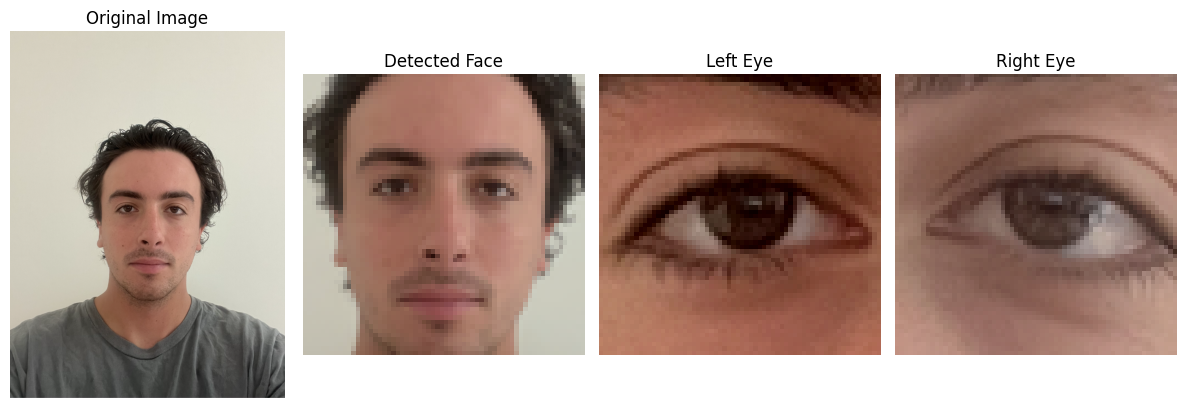

In [27]:
import torch
import torchvision.transforms.functional as TF
import random
# Example usage (for Jupyter, Colab, or IPython cell)
if __name__ == "__main__":
    image_path = "Screenshot.jpg"
    img = load_image(image_path)
    
    face = crop_to_box_face(img)

    
    left_eye = crop_to_box_left_eye(face)

    
    right_eye = crop_to_box_right_eye(face)


    # Show results inline
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    # Face crop
    plt.subplot(1, 4, 2)
    plt.imshow(color_jitter(resize_image(face)))
    plt.title("Detected Face")
    plt.axis("off")

    # Left eye
    plt.subplot(1, 4, 3)
    plt.imshow(color_jitter(resize_image(left_eye)))
    plt.title("Left Eye")
    plt.axis("off")

    # Right eye
    plt.subplot(1, 4, 4)
    plt.imshow(color_jitter(resize_image(right_eye)))
    plt.title("Right Eye")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

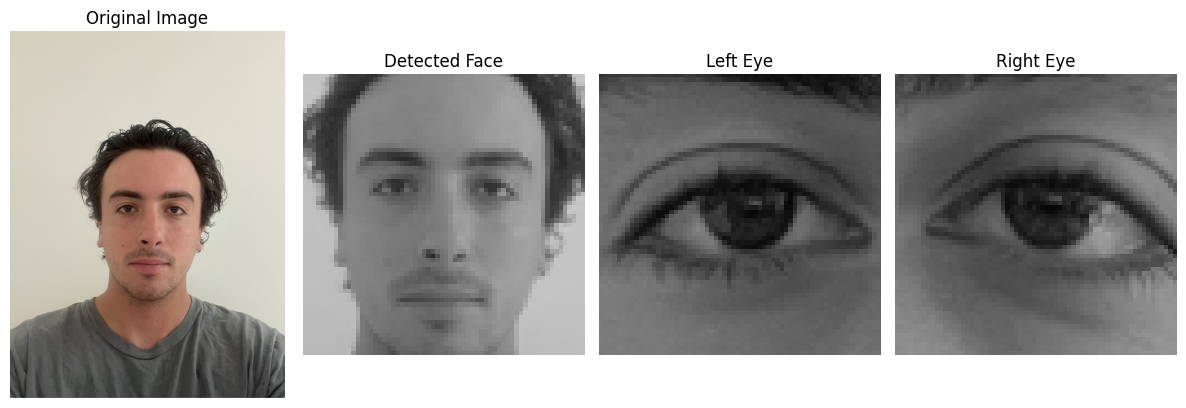

In [7]:
import torch
import torchvision.transforms.functional as TF
import random
# Example usage (for Jupyter, Colab, or IPython cell)
if __name__ == "__main__":
    image_path = "Screenshot.jpg"
    img = load_image(image_path)
    
    face = crop_to_box_face(img)

    
    left_eye = crop_to_box_left_eye(face)

    
    right_eye = crop_to_box_right_eye(face)


    # Show results inline
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    # Face crop
    plt.subplot(1, 4, 2)
    plt.imshow(convert_to_grayscale(color_jitter(resize_image(face))))
    plt.title("Detected Face")
    plt.axis("off")

    # Left eye
    plt.subplot(1, 4, 3)
    plt.imshow(convert_to_grayscale(color_jitter(resize_image(left_eye))))
    plt.title("Left Eye")
    plt.axis("off")

    # Right eye
    plt.subplot(1, 4, 4)
    plt.imshow(convert_to_grayscale(color_jitter(resize_image(right_eye))))
    plt.title("Right Eye")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

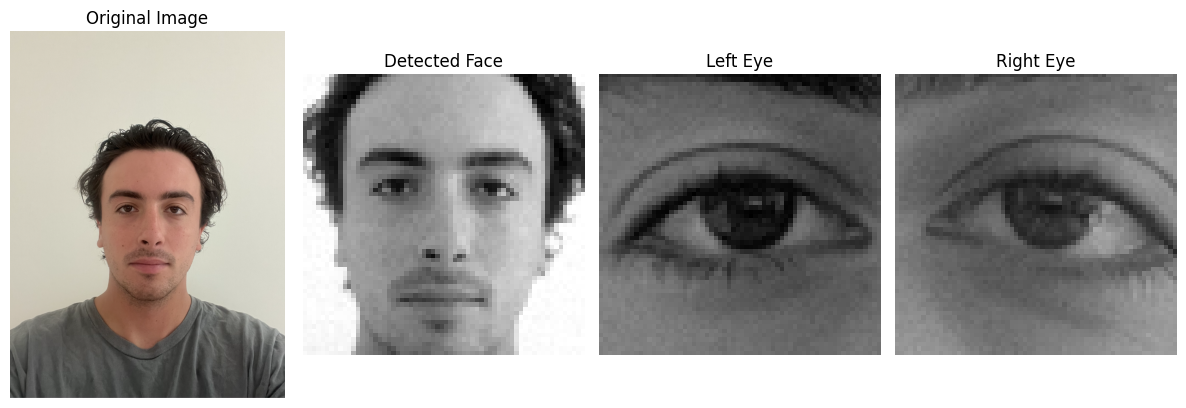

In [8]:
import torch
import torchvision.transforms.functional as TF
import random
# Example usage (for Jupyter, Colab, or IPython cell)
if __name__ == "__main__":
    image_path = "Screenshot.jpg"
    img = load_image(image_path)
    
    face = crop_to_box_face(img)

    
    left_eye = crop_to_box_left_eye(face)

    
    right_eye = crop_to_box_right_eye(face)


    # Show results inline
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    # Face crop
    plt.subplot(1, 4, 2)
    plt.imshow(add_gaussian_noise(convert_to_grayscale(color_jitter(resize_image(face)))))
    plt.title("Detected Face")
    plt.axis("off")

    # Left eye
    plt.subplot(1, 4, 3)
    plt.imshow(add_gaussian_noise(convert_to_grayscale(color_jitter(resize_image(left_eye)))))
    plt.title("Left Eye")
    plt.axis("off")

    # Right eye
    plt.subplot(1, 4, 4)
    plt.imshow(add_gaussian_noise(convert_to_grayscale(color_jitter(resize_image(right_eye)))))
    plt.title("Right Eye")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [26]:
import torch
from torchvision.transforms.functional import to_tensor

torch.set_printoptions(precision=1, threshold=100, edgeitems=2)

def to_tensor_image(img): 
    return to_tensor(img)

print(to_tensor(crop_to_box_left_eye(face)))


tensor([[[0.2, 0.3,  ..., 0.3, 0.3],
         [0.3, 0.3,  ..., 0.3, 0.2],
         ...,
         [0.6, 0.6,  ..., 0.6, 0.6],
         [0.6, 0.6,  ..., 0.6, 0.6]],

        [[0.1, 0.2,  ..., 0.1, 0.1],
         [0.2, 0.2,  ..., 0.2, 0.1],
         ...,
         [0.4, 0.4,  ..., 0.4, 0.4],
         [0.5, 0.4,  ..., 0.4, 0.4]],

        [[0.1, 0.1,  ..., 0.1, 0.1],
         [0.1, 0.2,  ..., 0.1, 0.0],
         ...,
         [0.3, 0.4,  ..., 0.3, 0.3],
         [0.4, 0.3,  ..., 0.3, 0.3]]])


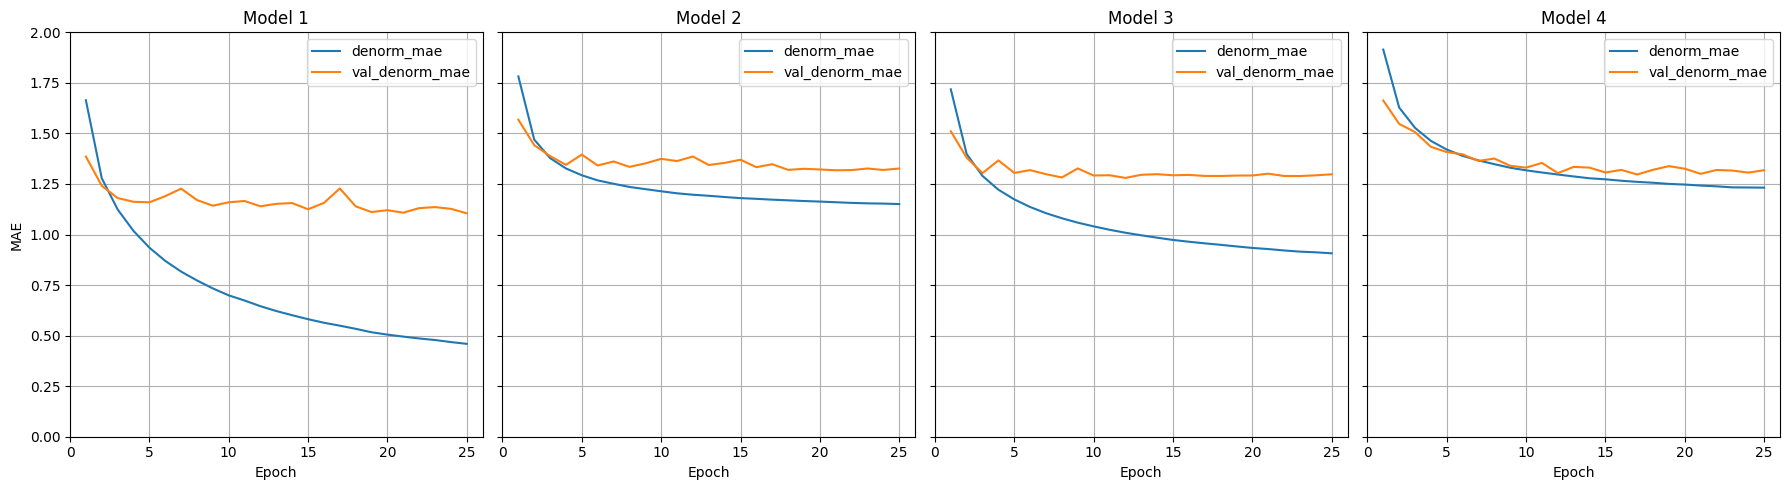

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths and titles
files = [
    ("training_histories/model_1_history.csv", "Model 1"),
    ("training_histories/model_2_history.csv", "Model 2"),
    ("training_histories/model_3_history.csv", "Model 3"),
    ("training_histories/model_4_history.csv", "Model 4")
]

# Create a figure with 3 horizontal subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

for ax, (file, title) in zip(axes, files):
    df = pd.read_csv(file)
    ax.plot(df["Epoch"], df["denorm_mae"], label="denorm_mae")
    ax.plot(df["Epoch"], df["val_denorm_mae"], label="val_denorm_mae")
    
    ax.set_ylim(0, 2)
    ax.set_xlim(0, 26)
    ax.set_title(title)
    ax.set_xlabel("Epoch")
    ax.grid(True)
    ax.legend()

axes[0].set_ylabel("MAE")
plt.tight_layout()
plt.show()

